In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import re
import os

# Task 2

In [26]:
# Read the files
task1_path = Path.cwd() / 'resources' / 'task_2'
df_properties = pd.read_csv(task1_path / 'reference_properties.tsv', sep='\t')
df_rfq = pd.read_csv(task1_path / 'rfq.csv')

In [27]:
df_rfq

,id,grade,grade_suffix,coating,finish,surface_type,surface_protection,form,thickness_min,thickness_max,...,weight_min,weight_max,inner_diameter_min,inner_diameter_max,outer_diameter_min,outer_diameter_max,yield_strength_min,yield_strength_max,tensile_strength_min,tensile_strength_max
0,8aff426d-b8c0-43aa-ad26-835ef4de6129,S700MC,NaN,NaN,Oiled,NaN,NaN,Coils,6.00,6.0,...,15000.0,25000.0,610.0,610.0,NaN,NaN,NaN,NaN,760.0,810.0
1,37e624be-b125-464f-85b6-1838530193ef,S250GD,NaN,ZM310,Hot-dip zinc magnesium (+ZM),NaN,NaN,Slit Coils,1.50,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b8257184-6307-46ab-b06e-d979336d1263,DX51D,NaN,Z100,Hot-dip Galvanized (+Z/+GI),NaN,Lightly Oiled (L),Coils,0.40,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63140d1f-dda8-40fe-8931-bcaba65d5772,S235,NaN,NaN,NaN,NaN,NaN,Round Tubes,1.50,1.5,...,53800.0,53800.0,NaN,NaN,60.3,NaN,NaN,NaN,NaN,NaN
4,11cffc57-44be-4d79-bfd5-97482be566d3,S235,NaN,NaN,NaN,NaN,NaN,Round Tubes,1.50,1.5,...,14500.0,14500.0,NaN,NaN,48.3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7a965ba4-be4e-4833-a723-1f98ed1f24ac,DX51D,NaN,Z080,Hot-dip Galvanized (+Z/+GI),NaN,NaN,Coils,0.55,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,82fc492f-0adc-49bd-8458-69bb1f0f318e,DD11,NaN,NaN,Hot Rolled,NaN,Pickled and Oiled,Coils,NaN,NaN,...,NaN,25000.0,610.0,610.0,NaN,NaN,NaN,NaN,NaN,NaN
997,d3db6f2f-6218-4612-8a63-c26d4ac69658,S550MC,NaN,NaN,Hot Rolled,NaN,Pickled and Oiled,Coils,3.40,3.6,...,25000.0,35000.0,610.0,610.0,NaN,NaN,NaN,NaN,NaN,NaN
998,90b02a62-3da9-4648-948c-52627d086a50,DD11,NaN,NaN,Hot Rolled,NaN,Pickled and Oiled,Coils,2.40,2.6,...,20000.0,25000.0,610.0,610.0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# rename propertires columns
column_mapping = {
    'Standards': 'standards',
    'Carbon (C)': 'carbon_C',
    'Manganese (Mn)': 'manganese_Mn', 
    'Silicon (Si)': 'silicon_Si',
    'Sulfur (S)': 'sulfur_S',
    'Phosphorus (P)': 'phosphorus_P',
    'Chromium (Cr)': 'chromium_Cr',
    'Nickel (Ni)': 'nickel_Ni',
    'Molybdenum (Mo)': 'molybdenum_Mo',
    'Vanadium (V)': 'vanadium_V',
    'Aluminum (Al)': 'aluminum_Al',
    'Titanium (Ti)': 'titanium_Ti',
    'Niobium (Nb)': 'niobium_Nb',
    'Boron (B)': 'boron_B',
    'Nitrogen (N)': 'nitrogen_N',
    'Tensile strength (Rm)': 'tensile_strength_Rm',
    'Yield strength (Re or Rp0.2)': 'yield_strength_RE_RP0.2', 
    'Elongation (A%)': 'elongation_A%',
    'Hardness (HB, HV, HRC)': 'hardness_HB_HV_HRC',
    'Impact toughness (Charpy V-notch)': 'impact_toughness_Charpy_V_notch',
    'Source_Pages': 'source_pages',
    'Application': 'application',
    'Category': 'category',
    'Nb + V + Ti (Others)': 'Nb_V_Ti_others',
    'Coating': 'coating'
}

df_properties = df_properties.rename(columns=column_mapping)

### Fix inconsistencies in grade

In [29]:
# Fix inconsistencies in grade
df_properties['Grade/Material'] = df_properties['Grade/Material'].replace({
    'HC380La': 'HC380LA',
    '26Mnb5': '26MnB5',
    'CR440Y780T DP': 'CR440Y780T-DP'
})

df_rfq['grade'] = df_rfq['grade'].replace({
    'HC380La': 'HC380LA',
    '26Mnb5': '26MnB5',
    'CR440Y780T DP': 'CR440Y780T-DP'
})

# Drop duplicates
df_properties = df_properties.drop_duplicates(subset=['Grade/Material'], keep='first')


In [30]:
# join datasets
df_merged = df_rfq.merge(
    df_properties, 
    left_on='grade',          
    right_on='Grade/Material', 
    how='left'
)

In [31]:
# check for missing grades matches
matches_found = False
for i in range(len(df_merged)):
    if df_merged.loc[i, 'grade'] is not np.nan and pd.isna(df_merged.loc[i, 'Grade/Material']):
        print(f"Row {i} has no match: {df_merged.loc[i, 'grade']}")
        matches_found = True

if not matches_found:
    print("All grades in rfq have a match in reference_properties.")
    df_merged.drop(columns=['Grade/Material'], inplace=True)

All grades in rfq have a match in reference_properties.


In [32]:
# Drop rows with missing grades
df_merged = df_merged.dropna(subset=['grade'])

# Drop empty columns
empty_cols = df_merged.columns[df_merged.isnull().all()].tolist()
df_merged = df_merged.drop(columns=empty_cols)

# Drop uninformative or wrong columns
cols_to_drop = ["height_max"]
df_merged = df_merged.drop(columns=cols_to_drop)

# Fix wrong column naming (height_min should be length_max)
df_merged = df_merged.rename(columns={'height_min': 'length_max'})

### Process Categorical Variables.  

Assumptions:
- missing values refers to standard features or to missing additional processing. Hence I set these empty values equal to nan



In [33]:
# Set missing data categorical columns as 'N/A'
categorical_cols = ["surface_protection", "coating_x", "form", "surface_type", "finish"]
for col in categorical_cols:
    df_merged.loc[df_merged[col].isna(), col] = np.nan

### Process Grade Properites

- When a biund is found, I set this equal to min and max

In [34]:
cols_with_ranges = [
    'carbon_C',
    'manganese_Mn',
    'silicon_Si',
    'sulfur_S',
    'phosphorus_P',
    'chromium_Cr',
    'nickel_Ni',
    'molybdenum_Mo',
    'vanadium_V',
    'aluminum_Al',
    'titanium_Ti',
    'niobium_Nb',
    'boron_B',
    'nitrogen_N',
    'tensile_strength_Rm',
    'yield_strength_RE_RP0.2',
    'elongation_A%',
    'hardness_HB_HV_HRC',
    'Nb_V_Ti_others'
]


In [35]:
def extract_ranges(col_name):
    mid_col_name = f"{col_name}_mid"  
    df_merged[mid_col_name] = np.nan  
    
    for row in range(len(df_merged)):
        value = df_merged.iloc[row][col_name]
        if pd.isna(value):
            continue
        
        value_str = str(value).strip()
        value_str_clean = re.sub(r"[^\d.\-<≥>≤]", "", value_str)
        
        if '-' in value_str_clean:
            parts = value_str_clean.split('-')
            try:
                low, high = float(parts[0]), float(parts[1])
                df_merged.loc[df_merged.index[row], mid_col_name] = (low + high) / 2 
            except ValueError:
                pass
        
        elif '<' in value_str_clean or '≤' in value_str_clean or '>' in value_str_clean or '≥' in value_str_clean:
            try:
                num_value = float(value_str_clean.replace('<', '').replace('≤', '').replace('>', '').replace('≥', '').strip())
                df_merged.loc[df_merged.index[row], mid_col_name] = num_value  
            except ValueError:
                pass
        else:
            df_merged.loc[df_merged.index[row], mid_col_name] = np.nan  
            print(f"Unexpected value format: {value} found in variable {col_name} at row {row}")

for col in cols_with_ranges:
    extract_ranges(col)

Unexpected value format: Variable found in variable carbon_C at row 722
Unexpected value format: Variable found in variable manganese_Mn at row 722
Unexpected value format: 0.50 found in variable silicon_Si at row 589
Unexpected value format: Variable found in variable silicon_Si at row 722
Unexpected value format: 415 MPa found in variable tensile_strength_Rm at row 589
Unexpected value format: Variable found in variable tensile_strength_Rm at row 722
Unexpected value format: 205 MPa found in variable yield_strength_RE_RP0.2 at row 589


### Process Dimensions

Approach
- There are 138 missing data for forms. I tried to input some of them by using inner_diameter_min which is a dimension existent only for Coils, Strpis, and Slit Coils. However, it is not clear to which of these 3 groups should the missing values be inputted. I furtherly assessed the 'width_min' dimension to look for informative variables as I thought it could help discriminate between different coils types. Also here a found hogh variability and gived up this approach.
- I choose to input 


In [36]:
# assess misisng values

print(df_merged.loc[df_merged['thickness_min'].isna(), "form"].value_counts())

form
Coils                72
Round Bars           12
Strips               10
Slit Coils            9
Sheets                3
I-Sections            3
H-Sections            2
Rectangular Tubes     1
Name: count, dtype: int64


In [37]:
# Fix outer_diameter values

# outer_diameter = 610.0 is a mistake, it should be inner_diameter 
mask = df_merged['form'][df_merged['outer_diameter_min'] == 610.0].index
df_merged.loc[mask, ['inner_diameter_min', 'inner_diameter_max']] = 610.0
df_merged.loc[mask, ['outer_diameter_min', 'outer_diameter_max']] = np.nan

# Set threshold for outer diameter
threshold = 2000
mask = df_merged['form'][df_merged['outer_diameter_min'] > threshold].index
df_merged.loc[mask, ['outer_diameter_min', 'outer_diameter_max']] = np.nan

In [38]:
# Inputting missing values for inner_diameter_min and inner_diameter_max
print('- Inspecting inner_diameter_min values equal to 610.0')
print(df_merged.loc[df_merged['inner_diameter_min'] == 610.0, "form"].value_counts())
print('\n- Values with inner_diameter_min equal to 610.0 are only Coils, Slit Coils, and Strips.\n--> I decided to impute inner_diameter missing values for these 3 forms with 610.0')

inner_diameter_mask = (df_merged['form'].isin(['Coils', 'Slit Coils', 'Strips']) & 
        df_merged['inner_diameter_min'].isna())

df_merged.loc[inner_diameter_mask, 'inner_diameter_min'] = 610
df_merged.loc[inner_diameter_mask, 'inner_diameter_max'] = 610

- Inspecting inner_diameter_min values equal to 610.0
form
Coils         156
Slit Coils     11
Strips          5
Name: count, dtype: int64

- Values with inner_diameter_min equal to 610.0 are only Coils, Slit Coils, and Strips.
--> I decided to impute inner_diameter missing values for these 3 forms with 610.0


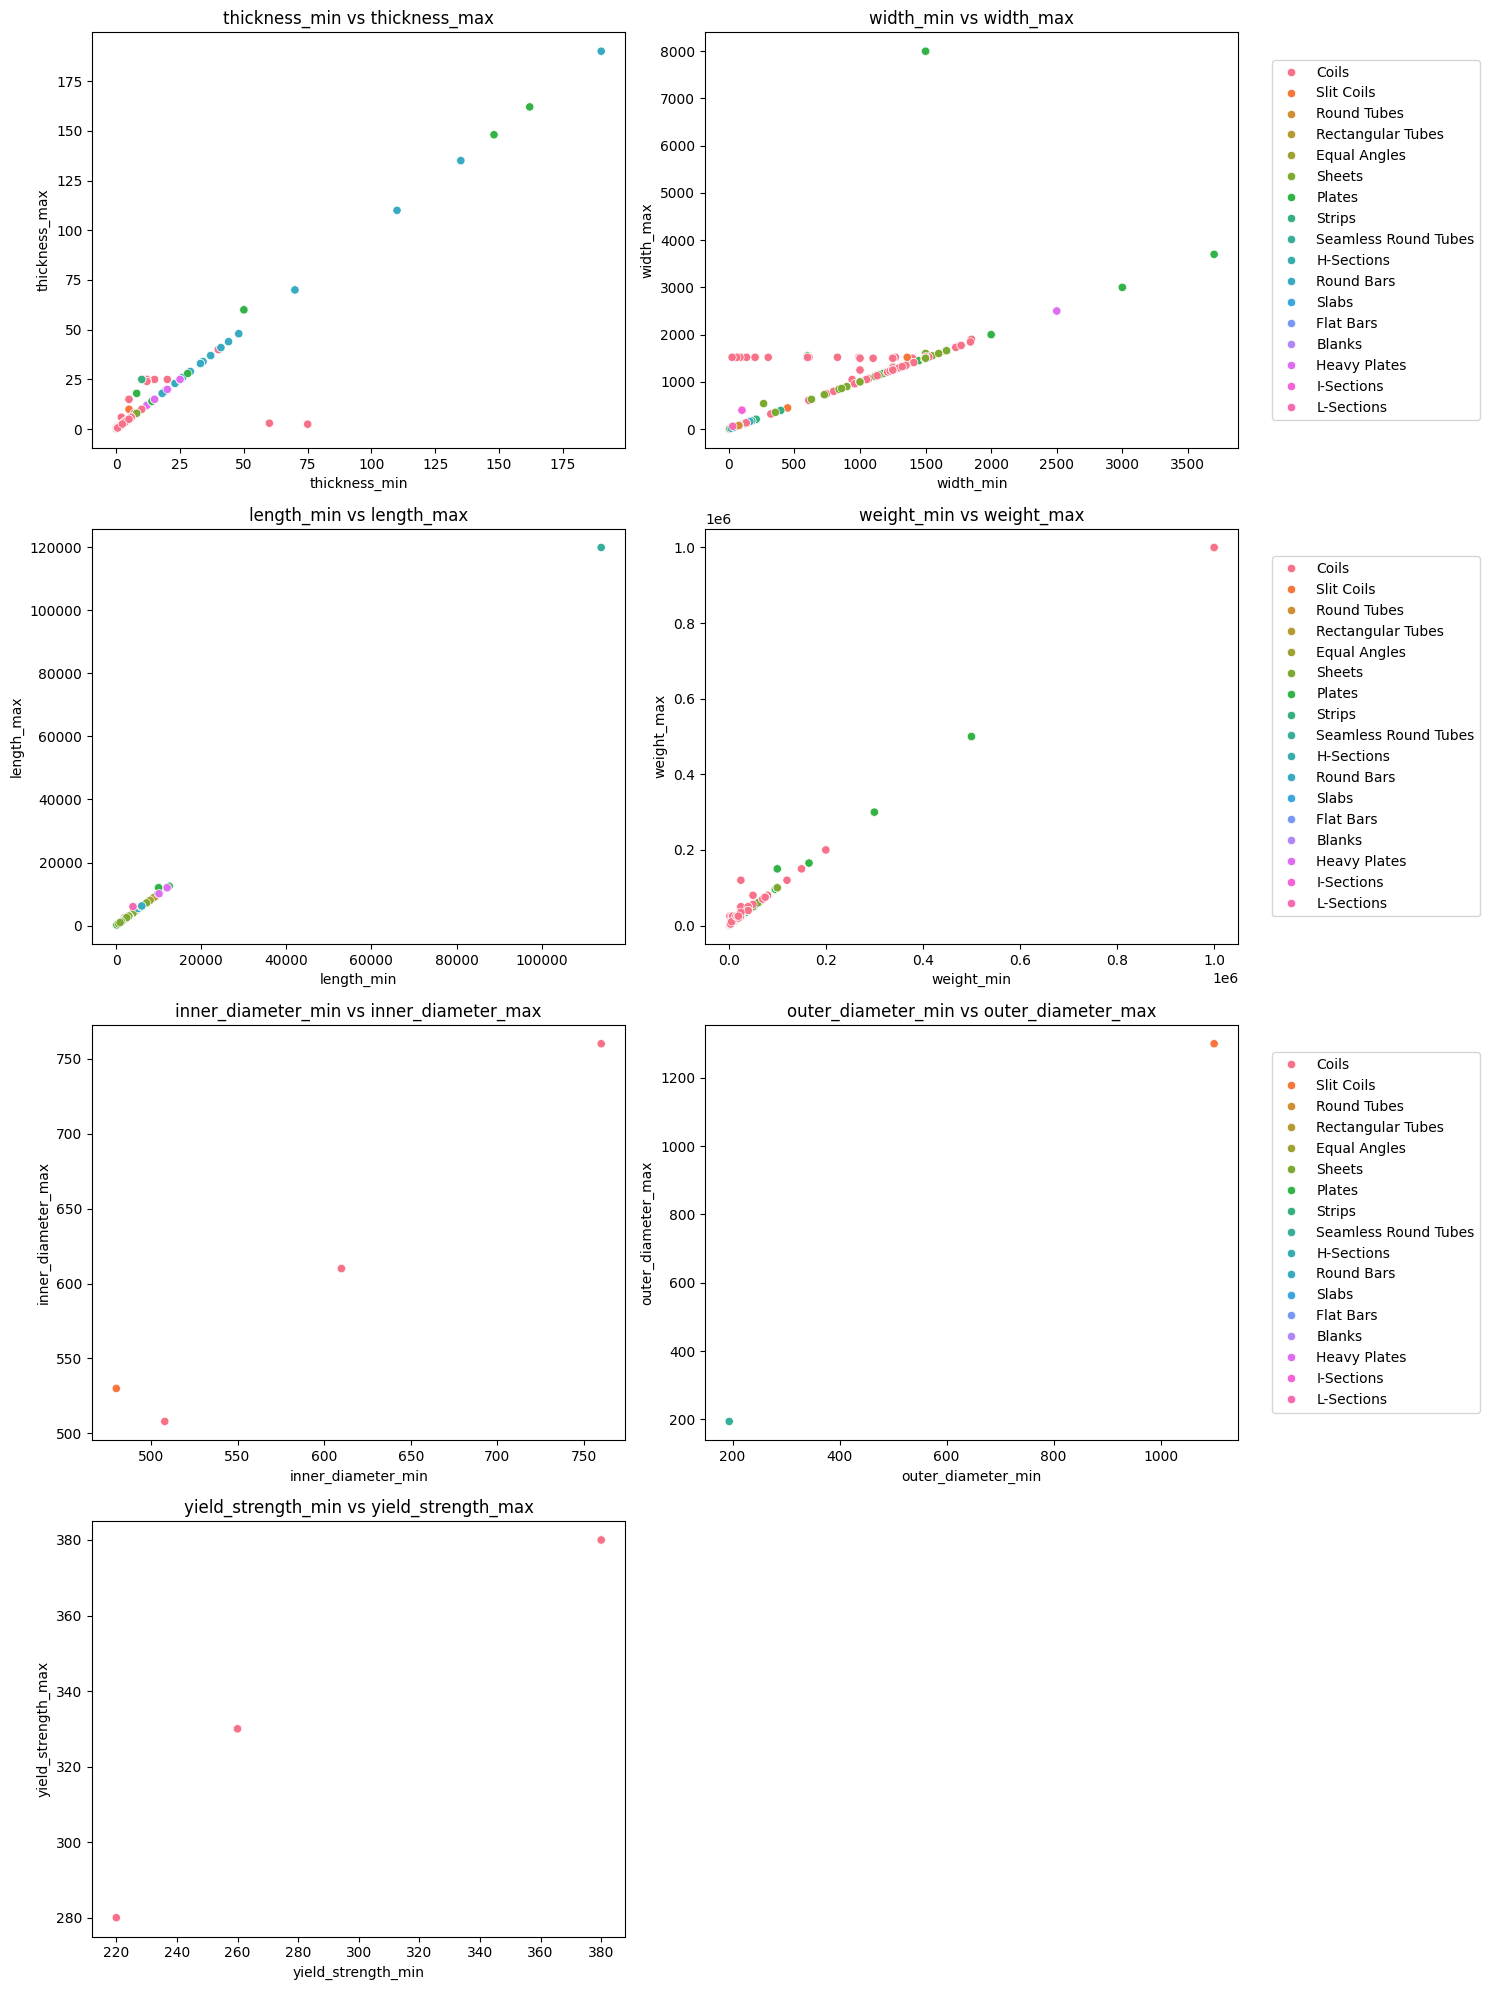

In [39]:
# Define your variable groups
var_groups = [
    ['thickness_min', 'thickness_max'],
    ['width_min', 'width_max'],
    ['length_min', 'length_max'],
    ['weight_min', 'weight_max'],
    ['inner_diameter_min', 'inner_diameter_max'],
    ['outer_diameter_min', 'outer_diameter_max'],
    ['yield_strength_min', 'yield_strength_max']
]

n_cols = 2
n_rows = (len(var_groups) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*5))
axes = axes.flatten()

# Create plots without legends
for i, vars in enumerate(var_groups):
    sns.scatterplot(data=df_merged, x=vars[0], y=vars[1], hue='form', ax=axes[i], legend=False)
    axes[i].set_title(f"{vars[0]} vs {vars[1]}")

# Remove empty subplots
for i in range(len(var_groups), len(axes)):
    fig.delaxes(axes[i])

# Create a temporary plot to get legend elements
temp_ax = fig.add_subplot(111, frame_on=False)
temp_ax.tick_params(labelcolor="none", bottom=False, left=False)
sns.scatterplot(data=df_merged, x='thickness_min', y='thickness_max', hue='form', ax=temp_ax)
handles, labels = temp_ax.get_legend_handles_labels()
temp_ax.remove()

# Add legends
legend_rows = [1, 3, 5]  
for i, row_idx in enumerate(legend_rows):
    if row_idx < len(axes) and i * 2 < len(var_groups):
        axes[row_idx].legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.tight_layout()
plt.show()

Fix thickness

In [40]:
# wrong thickness spotted (thickness_min > thickness_max)
mask =df_merged[df_merged['thickness_min'] > df_merged['thickness_max']].index
df_merged.loc[mask, ['thickness_min']] = df_merged.loc[mask, ['thickness_max']].values

# Input missing form on the basis of thickness
df_merged.loc[df_merged['thickness_min'] == 22.0, 'form'] = 'Coils'

Clean width

In [41]:
# founded unrealistic width of 8000, I input these values with the width min 
mask = df_merged['width_max'] == 8000
df_merged.loc[mask, 'width_max'] = df_merged.loc[mask, 'width_min']

# I found that all entries with width_max and width_min = 1520 are Coils, I will impute missing form with Coils
df_merged.loc[(df_merged['width_max'] == 1520) & (df_merged['form'] == 'None'), 'form'] = 'Coils'

Clean length

In [42]:
# Fix wrong max and min length by dividing by 10 those > 50000
mask = df_merged['length_min'] > 50000
df_merged.loc[mask, 'length_min'] = df_merged.loc[mask, 'length_min'] / 10
df_merged.loc[mask, 'length_max'] = df_merged.loc[mask, 'length_max'] / 10


Clean Weight

In [43]:
# Some weight are unrealistics. I will divide by 10 those weight > 200000
mask = df_merged['weight_min'] > 200000
df_merged.loc[mask, 'weight_min'] = df_merged.loc[mask, 'weight_min'] / 10
df_merged.loc[mask, 'weight_max'] = df_merged.loc[mask, 'weight_max'] / 10


Singleton dimension

In [44]:
# Manage singleton dimensions 
dimension_cols = [
    'thickness',
    'width',
    'length',
    'weight',
    'inner_diameter',
    'outer_diameter',
    'yield_strength',
    'tensile_strength'
]

def fill_singleton_dimensions(col):
    min_col = f"{col}_min"
    max_col = f"{col}_max"

    # If min is missing and max is present, set min to max
    df_merged.loc[
        df_merged[min_col].isna() & df_merged[max_col].notna(),
        min_col] = df_merged[max_col]

    # If max is missing and min is present, set max to min
    df_merged.loc[
        df_merged[max_col].isna() & df_merged[min_col].notna(),
        max_col] = df_merged[min_col]
    
for col in dimension_cols:
    fill_singleton_dimensions(col)

In [45]:
# save to csv
df_merged.to_csv('outputs/task_2_output.csv', index=False)

# Run Analyses

In [46]:
# Check grade properties columns sparsity
all_grade_properties_cols = ['carbon_C_mid',
       'manganese_Mn_mid', 'silicon_Si_mid', 'sulfur_S_mid',
       'phosphorus_P_mid', 'chromium_Cr_mid', 'nickel_Ni_mid',
       'molybdenum_Mo_mid', 'vanadium_V_mid', 'aluminum_Al_mid',
       'titanium_Ti_mid', 'niobium_Nb_mid', 'boron_B_mid', 'nitrogen_N_mid',
       'tensile_strength_Rm_mid', 'yield_strength_RE_RP0.2_mid',
       'elongation_A%_mid', 'hardness_HB_HV_HRC_mid', 'Nb_V_Ti_others_mid'
      ]

sparsity = df_merged[all_grade_properties_cols].isnull().mean() * 100
print(sparsity)

grade_properties_cols = [col for col in all_grade_properties_cols if sparsity[col] < 75]


carbon_C_mid                    0.106270
manganese_Mn_mid                0.106270
silicon_Si_mid                 42.826780
sulfur_S_mid                    1.275239
phosphorus_P_mid                1.275239
chromium_Cr_mid                93.304995
nickel_Ni_mid                  97.662062
molybdenum_Mo_mid              95.642933
vanadium_V_mid                 75.876727
aluminum_Al_mid                42.614240
titanium_Ti_mid                75.557917
niobium_Nb_mid                 75.664187
boron_B_mid                    99.256111
nitrogen_N_mid                 85.547290
tensile_strength_Rm_mid         0.212540
yield_strength_RE_RP0.2_mid     1.275239
elongation_A%_mid               2.125399
hardness_HB_HV_HRC_mid         94.580234
Nb_V_Ti_others_mid             88.841658
dtype: float64


In [ ]:
def run_grade_similarity(df, row1, row2, grade_properties_vars, distance_type='cosine'):
    vec1, vec2 = [], []
    for col in grade_properties_vars:
        val1, val2 = row1[col], row2[col]
        if not (pd.isna(val1) or pd.isna(val2)):
            # Normalize by column range
            col_min = df[col].min()
            col_range = df[col].max() - col_min
            if col_range > 0:
                vec1.append((val1 - col_min) / col_range)
                vec2.append((val2 - col_min) / col_range)
    
    if not vec1:
        return 0.0
    
    vec1, vec2 = np.array(vec1), np.array(vec2)

    if distance_type == 'cosine':
        return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    elif distance_type == 'euclidean':
        distance = np.linalg.norm(vec1 - vec2)
        return 1 - (distance / np.sqrt(len(vec1)))
    return 0.0


def categorical_similarity(val1, val2):
    if pd.isna(val1) and pd.isna(val2):
        return 1
    elif pd.isna(val1) or pd.isna(val2):
        return 0
    else:
        return 1 if val1 == val2 else 0

def run_categorical_similarity(row1, row2, dims):
    cat_matches = []
    for dim in dims:
        sim = categorical_similarity(row1[dim], row2[dim])
        if sim is not None:  
            cat_matches.append(sim)
    
    return sum(cat_matches) / len(cat_matches) if cat_matches else 0.0



def iou_similarity(min1, max1, min2, max2):
    intersection = max(0, min(max1, max2) - max(min1, min2))
    union = max(max1, max2) - min(min1, min2)
    return intersection / union if union > 0 else 0

def run_iou_similarity(row1, row2, dims):
    ious = []
    for dim in dims:
        min_col = f"{dim}_min"
        max_col = f"{dim}_max"
        ious.append(iou_similarity(
            row1[min_col], row1[max_col],
            row2[min_col], row2[max_col]
        ))
    return sum(ious) / len(ious)  

# Test the functions
ablations = []
df = df_merged.copy()

dimensions_matrix = np.zeros((len(df), len(df)))
categories_matrix = np.zeros((len(df), len(df)))
properties_matrix = np.zeros((len(df), len(df)))
grade_property_distance = 'euclidean'

for i in range(len(df)):
    if i % 20 == 0:
        print(f"Processing row {i}/{len(df)}")
    for j in range(len(df)):
        if i != j:
            if 'dimensions' not in ablations:
                sim_iou = run_iou_similarity(df.iloc[i], df.iloc[j],  dims=dimensions_vars)
                dimensions_matrix[i, j] = sim_iou
            if 'categories' not in ablations:
                sim_cat = run_categorical_similarity(df.iloc[i], df.iloc[j], dims=categorical_vars)
                categories_matrix[i, j] = sim_cat
            if 'properties' not in ablations:
                sim_prop = run_grade_similarity(df_merged, df.iloc[i], df.iloc[j], grade_properties_vars=grade_properties_vars, distance_type=grade_property_distance)
                properties_matrix[i, j] = sim_prop
        else:
            if 'dimensions' not in ablations:
                dimensions_matrix[i, j] = 1.0
            if 'categories' not in ablations:
                categories_matrix[i, j] = 1.0
            if 'properties' not in ablations:
                properties_matrix[i, j] = 1.0   

Processing row 0/941
Processing row 20/941
Processing row 40/941
Processing row 60/941
Processing row 80/941
Processing row 100/941
Processing row 120/941
Processing row 140/941
Processing row 160/941
Processing row 180/941
Processing row 200/941
Processing row 220/941
Processing row 240/941
Processing row 260/941


In [ ]:
weights = [1, 1, 1]
combined_similarity = ((properties_matrix*weights[0] + categories_matrix*weights[1] + dimensions_matrix*weights[2])/(3-len(ablations))).round(3)
sns.heatmap(combined_similarity)

# Run Analyses

In [51]:
# Check grade properties columns sparsity
all_grade_properties_vars = ['carbon_C_mid',
       'manganese_Mn_mid', 'silicon_Si_mid', 'sulfur_S_mid',
       'phosphorus_P_mid', 'chromium_Cr_mid', 'nickel_Ni_mid',
       'molybdenum_Mo_mid', 'vanadium_V_mid', 'aluminum_Al_mid',
       'titanium_Ti_mid', 'niobium_Nb_mid', 'boron_B_mid', 'nitrogen_N_mid',
       'tensile_strength_Rm_mid', 'yield_strength_RE_RP0.2_mid',
       'elongation_A%_mid', 'hardness_HB_HV_HRC_mid', 'Nb_V_Ti_others_mid'
      ]

sparsity = df_merged[all_grade_properties_vars].isnull().mean() * 100
print(sparsity)

grade_properties_vars = [col for col in all_grade_properties_vars if sparsity[col] < 75]
categorical_vars = ['coating_x', 'finish', 'surface_type', 'surface_protection', 'form']
dimensions_vars = ['length', 'width', 'thickness', 'weight', 'inner_diameter']

carbon_C_mid                    0.106270
manganese_Mn_mid                0.106270
silicon_Si_mid                 42.826780
sulfur_S_mid                    1.275239
phosphorus_P_mid                1.275239
chromium_Cr_mid                93.304995
nickel_Ni_mid                  97.662062
molybdenum_Mo_mid              95.642933
vanadium_V_mid                 75.876727
aluminum_Al_mid                42.614240
titanium_Ti_mid                75.557917
niobium_Nb_mid                 75.664187
boron_B_mid                    99.256111
nitrogen_N_mid                 85.547290
tensile_strength_Rm_mid         0.212540
yield_strength_RE_RP0.2_mid     1.275239
elongation_A%_mid               2.125399
hardness_HB_HV_HRC_mid         94.580234
Nb_V_Ti_others_mid             88.841658
dtype: float64


In [60]:
def get_top_n_similarities(similarity_matrix, n=5):
    similarity_no_perfect = similarity_matrix.copy()
    similarity_no_perfect[similarity_no_perfect == 1.0] = -np.inf
    top_n_indices = np.argsort(-similarity_no_perfect, axis=1)[:, :n]
    top_n_values = np.take_along_axis(similarity_matrix, top_n_indices, axis=1)
    return top_n_indices, top_n_values

top_n_indices, top_n_values = get_top_n_similarities(mat/3, n=3)

def create_output_csv(df, top_n_indices, top_n_values, output_path='outputs/task_2_similarities.csv'):
    results = []
    for idx in range(len(df)):
        similar_indices = top_n_indices[idx]
        similar_values = top_n_values[idx]
        for sim_idx, sim_val in zip(similar_indices, similar_values):
            results.append({
                'index':idx,
                'RFQ_ID': df.iloc[idx]['id'],
                'Similar_RFQ_ID': df.iloc[sim_idx]['id'],
                'Similarity_Score': round(float(sim_val), 3),
            })
    
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_path, index=False, float_format='%.3f')
    print(f"Similarity results saved to {output_path}")

create_output_csv(df_merged, top_n_indices, top_n_values)

Similarity results saved to outputs/task_2_similarities.csv


# Further Analyses

In [ ]:

def run_similarity_analysis(grade_property_distance, ablations, weights, df, dimensions_vars, categorical_vars, grade_properties_vars):
    """ Run similarity analysis with specified parameters. """
    dimensions_matrix = np.zeros((len(df), len(df)))
    categories_matrix = np.zeros((len(df), len(df)))
    properties_matrix = np.zeros((len(df), len(df)))

    for i in range(len(df)):
        if i % 20 == 0:
            print(f"Processing row {i}/{len(df)}")
        for j in range(len(df)):
            if i != j:
                if 'dimensions' not in ablations:
                    sim_iou = run_iou_similarity(df.iloc[i], df.iloc[j],  dims=dimensions_vars)
                    dimensions_matrix[i, j] = sim_iou
                if 'categories' not in ablations:
                    sim_cat = run_categorical_similarity(df.iloc[i], df.iloc[j], dims=categorical_vars)
                    categories_matrix[i, j] = sim_cat
                if 'properties' not in ablations:
                    sim_prop = run_grade_similarity(df_merged, df.iloc[i], df.iloc[j], grade_properties_vars=grade_properties_vars, distance_type=grade_property_distance)
                    properties_matrix[i, j] = sim_prop
            else:
                if 'dimensions' not in ablations:
                    dimensions_matrix[i, j] = 1.0
                if 'categories' not in ablations:
                    categories_matrix[i, j] = 1.0
                if 'properties' not in ablations:
                    properties_matrix[i, j] = 1.0   

    combined_similarity = ((properties_matrix*weights[0] + categories_matrix*weights[1] + dimensions_matrix*weights[2])/(3-len(ablations))).round(3)

    return combined_similarity


In [54]:
mat = run_similarity_analysis('euclidean', ablations=[], weights=[1,1,1], df=df_merged, dimensions_vars=dimensions_vars, categorical_vars=categorical_vars, grade_properties_vars=grade_properties_vars)

Processing row 0/941
Processing row 20/941
Processing row 40/941
Processing row 60/941
Processing row 80/941
Processing row 100/941
Processing row 120/941
Processing row 140/941
Processing row 160/941
Processing row 180/941
Processing row 200/941
Processing row 220/941
Processing row 240/941
Processing row 260/941
Processing row 280/941
Processing row 300/941
Processing row 320/941
Processing row 340/941
Processing row 360/941
Processing row 380/941
Processing row 400/941
Processing row 420/941
Processing row 440/941
Processing row 460/941
Processing row 480/941
Processing row 500/941
Processing row 520/941
Processing row 540/941
Processing row 560/941
Processing row 580/941
Processing row 600/941
Processing row 620/941
Processing row 640/941
Processing row 660/941
Processing row 680/941
Processing row 700/941
Processing row 720/941
Processing row 740/941
Processing row 760/941
Processing row 780/941
Processing row 800/941
Processing row 820/941
Processing row 840/941
Processing row 86

In [ ]:
explorations = {
    "baseline": {"weights": [1, 1, 1], "distance_type": 'euclidean', "ablations": []},
    "reweighted": {"weights": [3, 2, 1], "distance_type": 'euclidean', "ablations": []},
    "cosine": {"weights": [1, 1, 1], "distance_type": 'cosine', "ablations": []},
    "no_dimensions": {"weights": [1, 1, 1], "distance_type": 'euclidean', "ablations": ["dimensions"]},
    "no_categories": {"weights": [1, 1, 1], "distance_type": 'euclidean', "ablations": ["categories"]},
    "no_properties": {"weights": [1, 1, 1], "distance_type": 'euclidean', "ablations": ["properties"]}
}

matrices = {}

for exp_name, exp_params in explorations.items():
    print(f"Running run_similarity_analysis for: {exp_name} condition")
    matrices[exp_name] = run_similarity_analysis(**exp_params)


Running experiment: reweighted


TypeError: run_experiments() got an unexpected keyword argument 'distance_type'

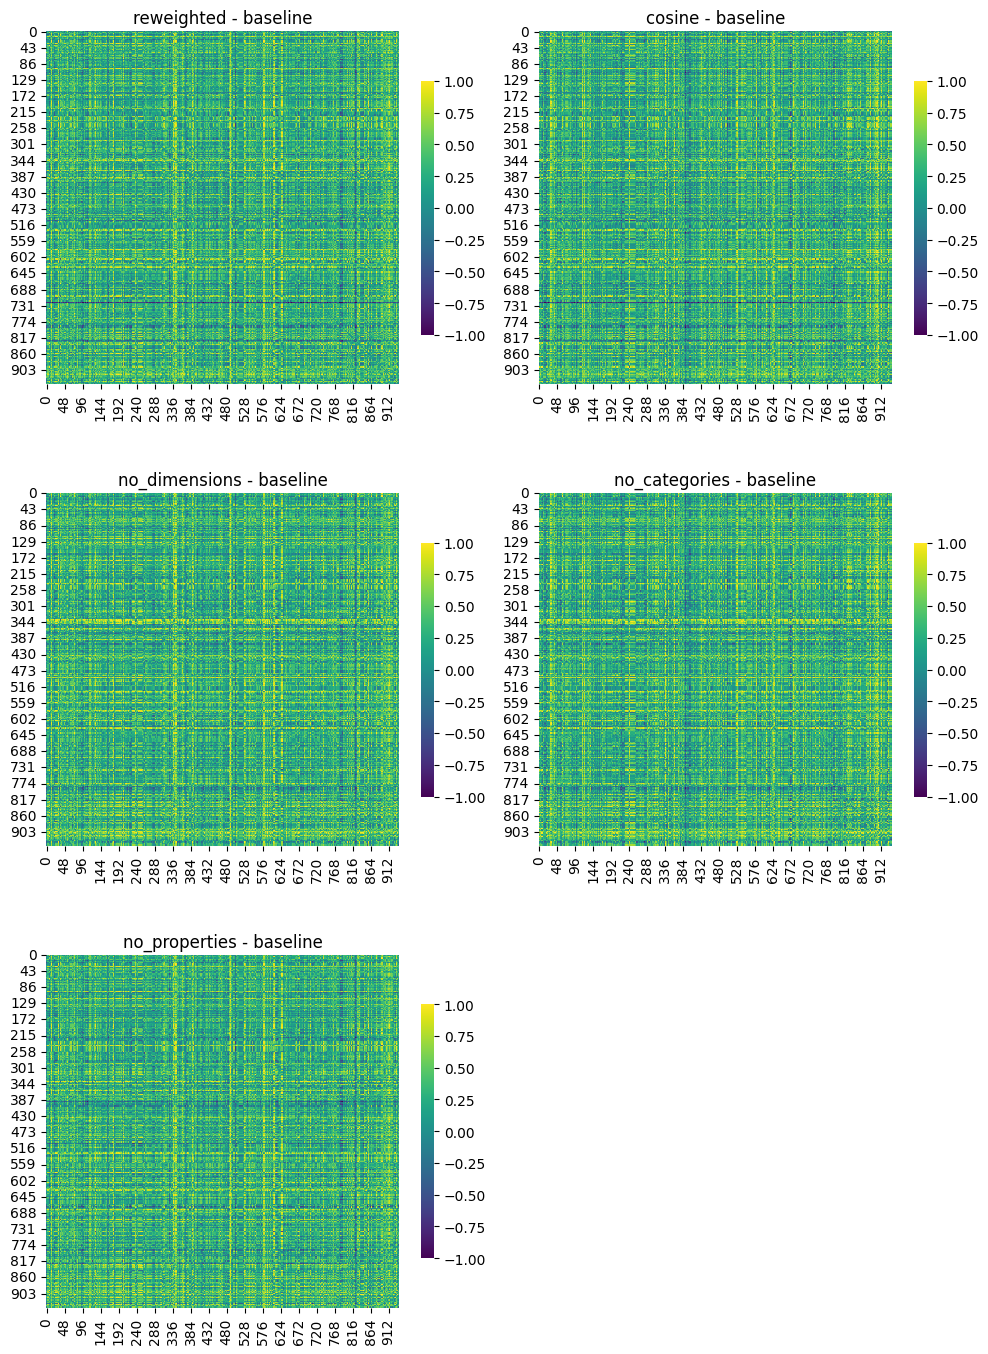

In [ ]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 14))
axes = axes.flatten()

baseline = categories_matrix.copy()

for i, exp_name in enumerate(matrices.keys()):
    diff = matrices[exp_name] - baseline
    sns.heatmap(diff, ax=axes[i], cmap='viridis', center=0, square=True, 
                cbar_kws={'shrink': 0.6})
    axes[i].set_title(f'Effect of:\n{exp_name} - baseline')

# Hide the 6th subplot since you only have 5
axes[5].set_visible(False)

plt.tight_layout()
plt.show()